In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-price-prediction-dataset/FINAL_USO.csv


In [2]:
df = pd.read_csv('/kaggle/input/gold-price-prediction-dataset/FINAL_USO.csv')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [5]:
# at first glance, data looks clean!
pd.set_option('max_rows', None)
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
SP_open          0
SP_high          0
SP_low           0
SP_close         0
SP_Ajclose       0
SP_volume        0
DJ_open          0
DJ_high          0
DJ_low           0
DJ_close         0
DJ_Ajclose       0
DJ_volume        0
EG_open          0
EG_high          0
EG_low           0
EG_close         0
EG_Ajclose       0
EG_volume        0
EU_Price         0
EU_open          0
EU_high          0
EU_low           0
EU_Trend         0
OF_Price         0
OF_Open          0
OF_High          0
OF_Low           0
OF_Volume        0
OF_Trend         0
OS_Price         0
OS_Open          0
OS_High          0
OS_Low           0
OS_Trend         0
SF_Price         0
SF_Open          0
SF_High          0
SF_Low           0
SF_Volume        0
SF_Trend         0
USB_Price        0
USB_Open         0
USB_High         0
USB_Low          0
USB_Trend        0
PLT_Price   

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


# Spliting 'Date' column into 'Year', 'Month' and 'Day' columns

In [7]:
#Before we proceed any farther, it will be helpful to split up the 'Date' column into:

# 'Year' column

df['Year'] = df['Date'].apply(lambda x:x.split('-')[0])

# 'Month' column 

df['Month'] = df['Date'].apply(lambda x:x.split('-')[1])

# 'Day' column 

df['Day'] = df['Date'].apply(lambda x:x.split('-')[2])

# dropping 'Date' column

df.drop('Date', axis = 1, inplace = True)

<AxesSubplot:xlabel='Year', ylabel='Adj Close'>

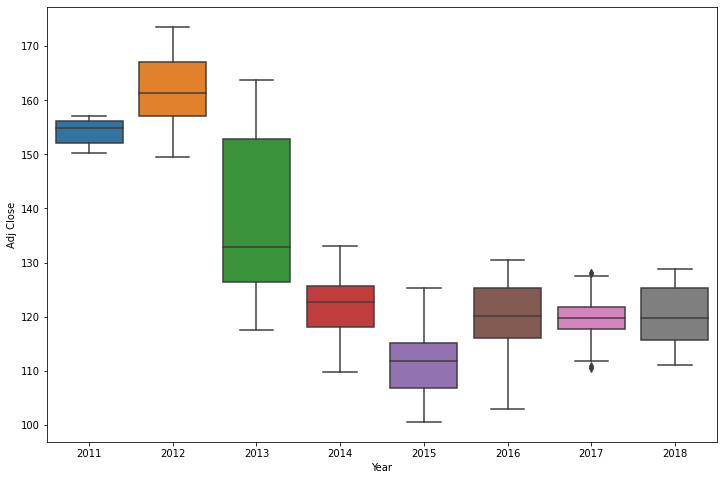

In [8]:
# gold price dropped by ~$40 from 2011 to 2018. 

#Aside from the year 2013, the annual price distribution is reasonably tight implying a stable investment 
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Year', y = 'Adj Close', data = df)

In [9]:
# ordering months for plotting
month_order = df['Month'].sort_values().unique()

<AxesSubplot:xlabel='Month', ylabel='Adj Close'>

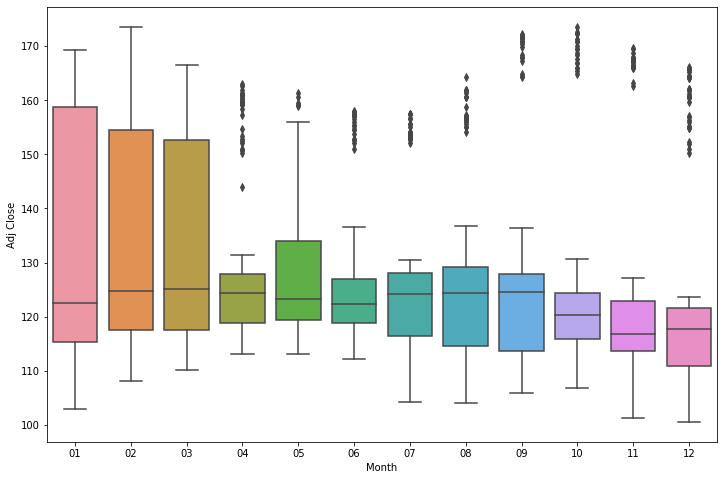

In [10]:
# gold prices appear to be more volatile in the early months of the year.

# note the mean is fairly flat except for a dip in October/November
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Month', y = 'Adj Close',order = month_order, data = df)

In [11]:
# ordering days for plotting 
day_order  = df['Day'].sort_values().unique()

<AxesSubplot:xlabel='Day', ylabel='Adj Close'>

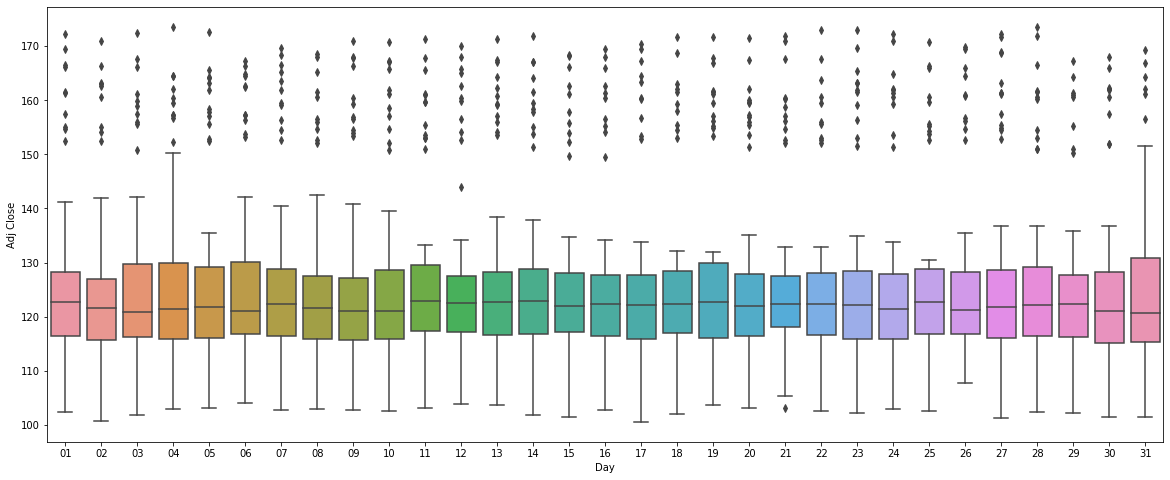

In [12]:
# no obvious change in distribution of closing gold prices throughout the days of the month
plt.figure(figsize=(20,8))
sns.boxplot(x = 'Day', y = 'Adj Close', order = day_order, data = df)

In [ ]:
#dataset is much too big to perform more exploratory data analysis. 

In [15]:
# our goal is the predict the adjusted closing price of gold. Splitting up the dataste appropriately: 

X = df.drop('Adj Close', axis = 1)
y = df['Adj Close']

# train test split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# scaling the model features

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print('\n')
print(X_test.shape)

(1202, 82)


(516, 82)


In [37]:
# our task requires regression analysis. We'll examime linear regression first

# Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

# In the task we're to evaluate our model on RMSE, Adjusted R2 and MAE

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_RMSE = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
lr_MAE = mean_absolute_error(y_test, lr_pred)

print(lr_RMSE)
print('\n')
print(lr_r2)
print('\n')
print(lr_MAE)

# with such strong preformance, no need to go further!

1.8314376716297157e-14


1.0


1.8314376716297157e-14


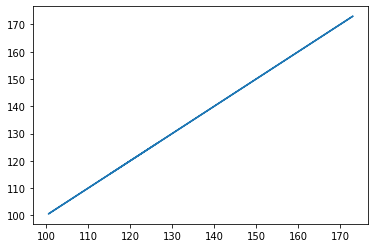

In [36]:
plt.plot(lr_pred, y_test)

<AxesSubplot:xlabel='Adj Close', ylabel='Count'>

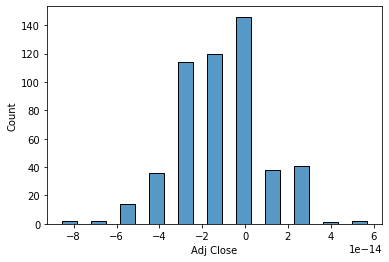

In [51]:
# incredibly small errors here. 
errors = y_test - lr_pred
sns.histplot(errors)

# Sample model testing

In [58]:
#call random row from data to examine
import random
ri = random.randint(0,len(df))
single_adj_close = df.drop('Adj Close', axis = 1).iloc[ri]
single_adj_close = scaler.transform(single_adj_close.values.reshape(-1,82))

print(lr.predict(single_adj_close))
print('\n')
print(df['Adj Close'].iloc[ri])

[119.040001]


119.040001


In [ ]:
#model performs well!